In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_07_25/U2020 Alarms 3 months before 2024_07_25 11_45pm/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Sort by 'First Occurred On' in descending order (latest alarms first)
df = data.sort_values(by='First Occurred On', ascending=False)

# Convert 'First Occurred On' to datetime, handle errors and fill NaT with a default date
df['First Occurred On'] = pd.to_datetime(df['First Occurred On'], errors='coerce')

# Reference time
reference_time = pd.to_datetime('2024-07-25 11:45:00')

# Calculate the relative day index, handle NaT by filling with a large negative number
df['Relative Day Index'] = ((df['First Occurred On'] - reference_time).dt.total_seconds() // 86400).fillna(-9999).astype(int)

# Adjust the index to set the 08:00 to 08:00 of the next day as 0, and previous days as -1, -2, -3, etc.
df['Relative Day Index'] = df['Relative Day Index'].apply(lambda x: x if x < 0 else x)

# Print the updated dataframe
print(df.head(50000))

# Filter the data for HUAWEI and Access domain
filtered_data = df[(df['Vendor'] == 'HUAWEI')]

# Retain only the specified columns
columns_to_keep = ['Site ID', 'Alarm Name', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index']
df_filtered = filtered_data[columns_to_keep]

# Encode categorical columns except 'Relative Day Index'
categorical_columns = df_filtered.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
    label_encoders[column] = le

# Print the updated dataframe
df_filtered.head(100)



Mounted at /content/drive


<ipython-input-1-35c85d54ca91>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-35c85d54ca91>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-35c85d54ca91>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-35c85d54ca91>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-35c85d54ca91>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-35c85d54ca91>:28: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


         EMS Name     Last Occurred On  \
3780970  U2020ACC  2024-07-25 23:47:21   
3780971  U2020ACC  2024-07-25 23:47:19   
3780972  U2020ACC  2024-07-25 23:47:18   
3780973  U2020ACC  2024-07-25 23:47:18   
3780974  U2020ACC  2024-07-25 23:47:08   
...           ...                  ...   
48595    U2020ACC  2024-07-24 15:56:04   
48597    U2020ACC  2024-07-24 15:56:02   
48598    U2020ACC  2024-07-24 15:56:00   
48599    U2020ACC  2024-07-24 15:55:57   
48600    U2020ACC  2024-07-24 15:55:54   

                                    Alarm Source Alarm Severity  \
3780970                           MLB_CloudUDN01          Major   
3780971  MC2_Kollupitiya_West_Reloc-CM1975-BDGHP          Minor   
3780972       MC2_Kilinochchi_South-KI0099-BDGHP          Major   
3780973                      new MLB FusionStage       Critical   
3780974          Brandix_Intimate_O_Ind-GM0352-K       Critical   
...                                          ...            ...   
48595                   We

<ipython-input-1-35c85d54ca91>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
<ipython-input-1-35c85d54ca91>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column].astype(str))
<ipython-input-1-35c85d54ca91>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Site ID,Alarm Name,Vendor,Domain,Device Type,Relative Day Index
3780970,4113,776,0,4,30,0
3780971,1406,687,0,1,8,0
3780972,2690,714,0,5,8,0
3780973,4113,645,0,4,30,0
3780974,1909,541,0,1,27,0
...,...,...,...,...,...,...
10,632,496,0,4,16,0
8,632,517,0,4,16,0
9,632,495,0,4,16,0
3781059,4113,645,0,4,30,0


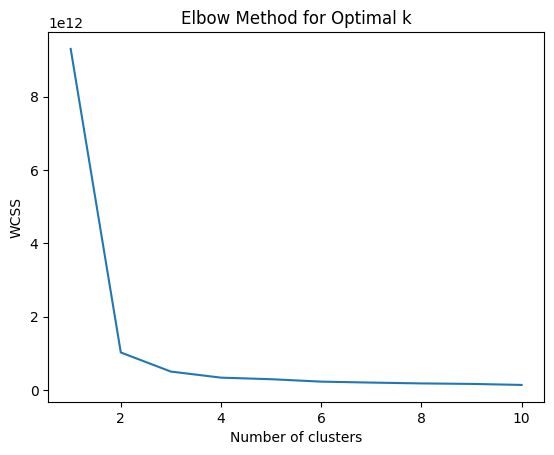

<ipython-input-3-9a749ec06eba>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(df_filtered)


             Site ID  Alarm Name  Vendor    Domain  Device Type  \
Cluster                                                           
0         734.973828  515.579922     0.0  2.204645    18.935317   
1        4054.402803  600.381244     0.0  3.090793    25.446361   
2        2489.058993  469.178519     0.0  2.057568    21.460259   

         Relative Day Index  
Cluster                      
0                -44.355712  
1                -41.535362  
2                -47.533941  
Cluster
0    1379231
1    1889775
2     531199
dtype: int64
Cluster 0 details:
Alarm Patterns:
Alarm Name
1       11
3        1
6        1
7        1
8        2
      ... 
917     89
918     12
919      4
922    170
923      1
Length: 457, dtype: int64


Cluster 1 details:
Alarm Patterns:
Alarm Name
0         4
1       579
2         1
5        23
7         1
       ... 
912    4294
920    1208
921     395
924       6
925       3
Length: 708, dtype: int64


Cluster 2 details:
Alarm Patterns:
Alarm Name
4      

<ipython-input-3-9a749ec06eba>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']] = scaler.fit_transform(df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1856/1856 ━━━━━━━━━━━━━━━━━━━━ 318s 170ms/step - loss: 0.0615
                                     Alarm Name Site ID  Vendor  Domain  \
0                       MTP Communication Fault  KL0108  HUAWEI  Others   
1                                  MGW overload  KL0031  HUAWEI  Others   
2  MTP Destination Signaling Point Inaccessible  KI0053  HUAWEI    NFVI   
3                           Mains Failure Alarm  KE0066  HUAWEI    NFVI   
4                                  Module Fault  KA0608  HUAWEI    NFVI   
5    Monitoring Device Maintenance Link Failure  KA0254  HUAWEI    NFVI   
6                  NE License Feature On Trial   KA0219  HUAWEI    NFVI   

  Device Type  Relative Day Index   Cluster  
0         UIM                 2.0  0.826851  
1         UIM                 3.0  0.816315  
2         UIM                 4.0  0.797954  
3         UNC                 5.0  0.776291  
4         UNC                 6.0  0.756805  
5         UNC                 7.0  0.747433  
6         UNC  

In [ ]:
# Clustering to find common patterns
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_filtered)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KMeans model with the optimal number of clusters
optimal_clusters = 3  # For instance, we choose 3 based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered)

# Analyze the clusters
print(df_filtered.groupby('Cluster').mean())
print(df_filtered.groupby('Cluster').size())

# Print cluster details and alarm patterns
cluster_patterns = {}
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster} details:")
    cluster_data = df_filtered[df_filtered['Cluster'] == cluster]
    alarm_patterns = cluster_data.groupby(['Alarm Name']).size()
    cluster_patterns[cluster] = alarm_patterns
    print("Alarm Patterns:")
    print(alarm_patterns)
    print("\n")

# Plot the clusters
# sns.pairplot(df_filtered, hue='Cluster')
# plt.show()

# Inverse transform the scaled columns for interpretation
# scaler = MinMaxScaler()
# df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']] = scaler.inverse_transform(df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']])

# Convert back to original categorical values using label_encoders
# for column in label_encoders.keys():
#     df_filtered[column] = label_encoders[column].inverse_transform(df_filtered[column].round().astype(int))

# Display sample output of clustered data
print(df_filtered.head(100))

# Re-scale the dataframe for LSTM
scaler = MinMaxScaler()
df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']] = scaler.fit_transform(df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']])

# Prepare the dataset for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
features = df_filtered[['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster']].values
X, y = create_dataset(features, time_steps)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], time_steps, X.shape[2])

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X.shape[2])))
model.add(LSTM(50))
model.add(Dense(X.shape[2]))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=1, batch_size=2048, verbose=1)

# Predict for the next 7 days (each day has 24 hours)
predictions = []
current_batch = features[-time_steps:].reshape((1, time_steps, X.shape[2]))

for i in range(24 * 7):  # 24 hours * 7 days
    pred = model.predict(current_batch, verbose=0)[0]
    predictions.append(pred)
    current_batch = np.append(current_batch[:, 1:, :], [[pred]], axis=1)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame for predictions
relative_day_indices = np.arange(df_filtered['Relative Day Index'].max() + 1, df_filtered['Relative Day Index'].max() + 1 + 24 * 7)
pred_df = pd.DataFrame(predictions, columns=['Alarm Name', 'Site ID', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index', 'Cluster'])
pred_df['Relative Day Index'] = relative_day_indices

# Convert back to original categorical values using label_encoders
for column in label_encoders.keys():
    pred_df[column] = pred_df[column].round().astype(int)
    pred_df[column] = label_encoders[column].inverse_transform(pred_df[column])

# Display sample output of predictions with cluster details
print(pred_df.head(7))

# Print the cluster patterns for the predicted alarms
for index, row in pred_df.iterrows():
    cluster = int(row['Cluster'])
    print(f"Predicted Alarm for Relative Day Index {row['Relative Day Index']}:")
    print(f"Cluster {cluster} Alarm Patterns:")
    print(cluster_patterns[cluster])
    print("\n")
